# Exploratory and Explanatory Data Analysis (and Cleaning)

In [1]:
# Importing packages
import polars as pl

from project_d100.data import load_data, summary, extract_day, denormalise, ren_year, move_col, check_sum
from project_d100.visualisations import plot_corr, plot_count, plot_dist, plot_box

In [2]:
# Configure the display of tables
pl.Config.set_tbl_width_chars(200)
pl.Config.set_tbl_cols(-1)
pl.Config.set_tbl_rows(10)

polars.config.Config

## EDA: Part 1

In [3]:
# Load data and basic visualisation
df_unclean = load_data()
df_unclean.head(n=5)

instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
i64,str,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,i64,i64,i64
1,"""2011-01-01""",1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,"""2011-01-01""",1,0,1,1,0,6,0,1,0.22,0.2727,0.8,0.0,8,32,40
3,"""2011-01-01""",1,0,1,2,0,6,0,1,0.22,0.2727,0.8,0.0,5,27,32
4,"""2011-01-01""",1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,"""2011-01-01""",1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
# Summary of the data
summary(df_unclean)


Data Shape (rows, columns)
(17379, 17)

Data Types
instant: Int64
dteday: String
season: Int64
yr: Int64
mnth: Int64
hr: Int64
holiday: Int64
weekday: Int64
workingday: Int64
weathersit: Int64
temp: Float64
atemp: Float64
hum: Float64
windspeed: Float64
casual: Int64
registered: Int64
cnt: Int64

Missing Values
shape: (1, 17)
┌─────────┬────────┬────────┬─────┬──────┬─────┬─────────┬─────────┬────────────┬────────────┬──────┬───────┬─────┬───────────┬────────┬────────────┬─────┐
│ instant ┆ dteday ┆ season ┆ yr  ┆ mnth ┆ hr  ┆ holiday ┆ weekday ┆ workingday ┆ weathersit ┆ temp ┆ atemp ┆ hum ┆ windspeed ┆ casual ┆ registered ┆ cnt │
│ ---     ┆ ---    ┆ ---    ┆ --- ┆ ---  ┆ --- ┆ ---     ┆ ---     ┆ ---        ┆ ---        ┆ ---  ┆ ---   ┆ --- ┆ ---       ┆ ---    ┆ ---        ┆ --- │
│ u32     ┆ u32    ┆ u32    ┆ u32 ┆ u32  ┆ u32 ┆ u32     ┆ u32     ┆ u32        ┆ u32        ┆ u32  ┆ u32   ┆ u32 ┆ u32       ┆ u32    ┆ u32        ┆ u32 │
╞═════════╪════════╪════════╪═════╪══════╪═════

## TODO:
- season, year, and mnth features were extracted from dteday (I extract day, then drop dteday)
- renaming 0 and 1 in yr to 2011 and 2012 - decreases confusion in the future
- The following features need to be turned into categoricals: season, year, mnth, hr, holiday, weekday, workingday, weathersit (review again after visualisation)
- De-normalise data for following features: temp (41), atemp (50), hum (100), windspeed (67)
    - According to Readme.txt, they normalised data by dividing by max values (in the parentheses above)

### Other points:
- no missing values
- no duplicates

In [5]:
# Extracting the day from the date
df_unclean = extract_day(df_unclean, "dteday")
df_unclean = move_col(df_unclean, "day", 4)

In [6]:
# Renaming the year values
df_unclean = ren_year(df_unclean, "yr")

In [7]:
# Denormalising data
normalised_cols = {"temp" : 41, "atemp" : 50, "hum" : 100, "windspeed" : 67}
for col, value in normalised_cols.items():
    df_unclean = denormalise(df_unclean, col, value)

In [8]:
# Reorganising columns for easier visualisation - target variable first
df_unclean = move_col(df_unclean, "cnt", 1)
df_unclean = move_col(df_unclean, "casual", 2)
df_unclean = move_col(df_unclean, "registered", 3)

## EDA: Part 2

In [9]:
summary(df_unclean)


Data Shape (rows, columns)
(17379, 17)

Data Types
instant: Int64
cnt: Int64
casual: Int64
registered: Int64
season: Int64
yr: Int32
mnth: Int64
day: Int8
hr: Int64
holiday: Int64
weekday: Int64
workingday: Int64
weathersit: Int64
temp: Float64
atemp: Float64
hum: Float64
windspeed: Float64

Missing Values
shape: (1, 17)
┌─────────┬─────┬────────┬────────────┬────────┬─────┬──────┬─────┬─────┬─────────┬─────────┬────────────┬────────────┬──────┬───────┬─────┬───────────┐
│ instant ┆ cnt ┆ casual ┆ registered ┆ season ┆ yr  ┆ mnth ┆ day ┆ hr  ┆ holiday ┆ weekday ┆ workingday ┆ weathersit ┆ temp ┆ atemp ┆ hum ┆ windspeed │
│ ---     ┆ --- ┆ ---    ┆ ---        ┆ ---    ┆ --- ┆ ---  ┆ --- ┆ --- ┆ ---     ┆ ---     ┆ ---        ┆ ---        ┆ ---  ┆ ---   ┆ --- ┆ ---       │
│ u32     ┆ u32 ┆ u32    ┆ u32        ┆ u32    ┆ u32 ┆ u32  ┆ u32 ┆ u32 ┆ u32     ┆ u32     ┆ u32        ┆ u32        ┆ u32  ┆ u32   ┆ u32 ┆ u32       │
╞═════════╪═════╪════════╪════════════╪════════╪═════╪══════╪═══

In [10]:
# Checking for inconsistencies in the target variable
check_sum(df_unclean, "cnt", "casual", "registered")

In [11]:
# Dropping the casual and registered columns
df_unclean = df_unclean.drop(["casual", "registered"])

## EDA: Visualisations

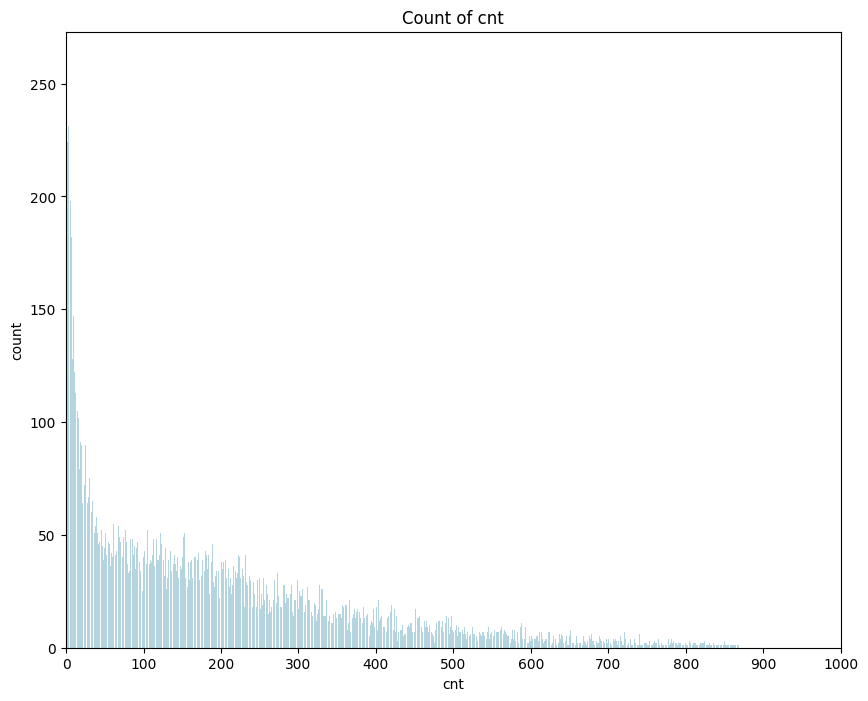

In [12]:
plot_count(df_unclean, "cnt", xticks = (0,1000))

/Users/govindniravrao/miniconda3/envs/project_d100/lib/python3.13/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: Using fork() can cause Polars to deadlock in the child process.
In addition, using fork() with Python in general is a recipe for mysterious
deadlocks and crashes.

The most likely reason you are seeing this error is because you are using the
multiprocessing module on Linux, which uses fork() by default. This will be
fixed in Python 3.14. Until then, you want to use the "spawn" context instead.

See https://docs.pola.rs/user-guide/misc/multiprocessing/ for details.

If you really know what your doing, you can silence this warning with the warning module
or by setting POLARS_ALLOW_FORKING_THREAD=1.

  pid = os.fork()
2024-12-12 15:03:00.139 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=5.5e-05)
2024-12-12 15:03:00.189 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted gamma distributio

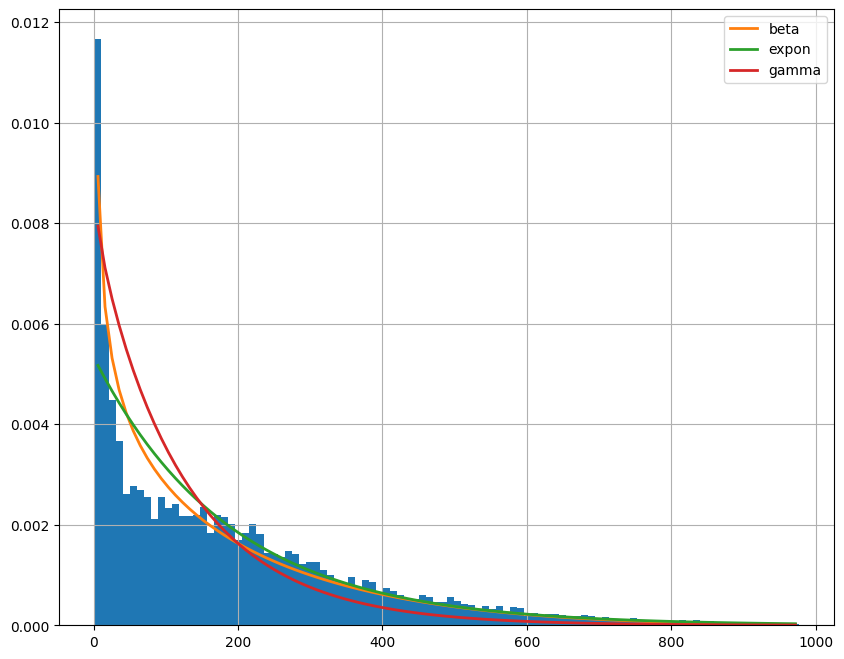

In [13]:
plot_dist(df_unclean, "cnt", dist = ["gamma", "expon", "beta"])

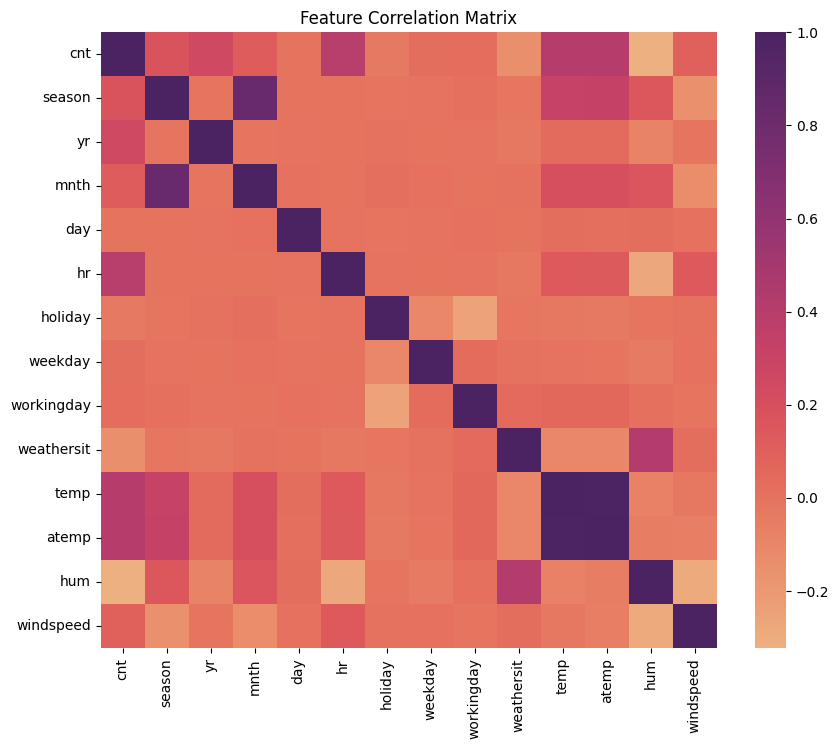

In [14]:
plot_corr(df_unclean, "instant")

In [ ]:
plot_box(df_unclean, y_var = "hr", x_var = "cnt")